In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
datos1 = pd.read_csv('ejercicio_1.csv', sep=',')
datos2 = pd.read_csv('ejercicio_2.csv', sep=',')
datos3 = pd.read_csv('ejercicio_3.csv', sep=',')
datos4 = pd.read_csv('ejercicio_4.csv', sep=',')

In [87]:
datos1

,X,Y
0,-4.406280,-1.383344
1,-2.722675,3.918974
2,4.610505,3.513816
3,3.510524,1.139324
4,8.767744,4.575692
...,...,...
95,-3.938697,-3.316558
96,18.097452,14.914027
97,7.836851,6.051094
98,-7.145026,-7.592345


In [88]:
def graficar(df, colA, colB, ejercicio, palette):
    eje_x = []
    eje_y = []
    for index, row in df.iterrows():
        eje_x.append(row[colA])
        eje_y.append(row[colB])

    sns.scatterplot(x = eje_x, y = eje_y, hue = eje_y, palette=palette, legend=False)
    plt.title('Scatter Plot ' + ejercicio)
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')

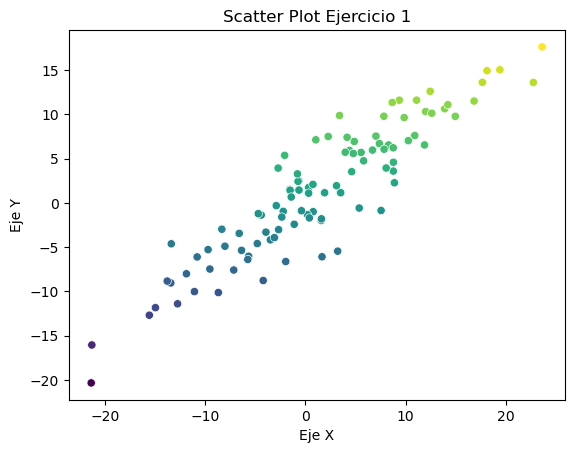

In [89]:
graficar(datos1, 'X', 'Y', 'Ejercicio 1', 'viridis')

Hallamos la recta que mejor aproxima los datos

In [90]:
def graficar_recta(df, colA, colB, palette, ejercicio):
    X = df[colA].to_numpy()
    y = df[colB].to_numpy()

    # Asegurarse de que tengan la misma longitud
    assert X.shape == y.shape

    # Normalizar X
    X_centrado = X - np.mean(X)
    X_normalizado = X_centrado / np.linalg.norm(X_centrado)

    # Calcular beta (escalar)
    beta = np.dot(X_normalizado, y)  # en lugar de @ si hay dudas

    # Calcular y_pred
    y_pred = beta * X_normalizado  # mismo tamaño que X

    # Construir DataFrame para graficar
    df_grafico = df.copy()
    df_grafico['Y_pred'] = y_pred

    # Graficar con Seaborn
    sns.scatterplot(data=df_grafico, x=colA, y=colB, hue=colB, palette=palette, legend=False)
    sns.lineplot(data=df_grafico, x=colA, y='Y_pred', color='red', label='$\\beta = X^T y$')
    plt.title('Recta aproximada ' + ejercicio)
    plt.show()

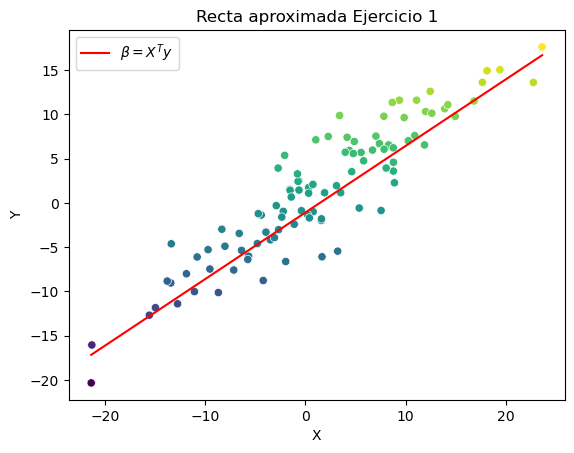

In [91]:
graficar_recta(datos1, 'X', 'Y', 'viridis', 'Ejercicio 1')

Repetimos los incisos (a) y (b), pero considerando los puntos {($x_i$, $y_i$ + 12) con i = 1...n}, donde ($x_i$, $y_i$) eran los puntos originales.


In [92]:
datos1c = datos1.copy()

for index, row in datos1c.iterrows():
    row['Y'] += 12

In [93]:
datos1c

,X,Y
0,-4.406280,10.616656
1,-2.722675,15.918974
2,4.610505,15.513816
3,3.510524,13.139324
4,8.767744,16.575692
...,...,...
95,-3.938697,8.683442
96,18.097452,26.914027
97,7.836851,18.051094
98,-7.145026,4.407655


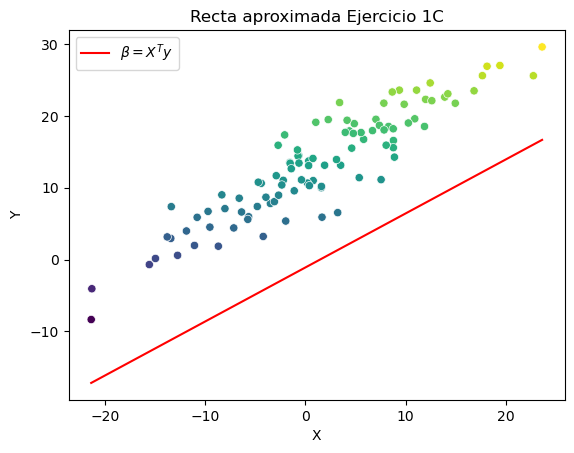

In [94]:
graficar_recta(datos1c, 'X', 'Y', 'viridis', 'Ejercicio 1C')

2

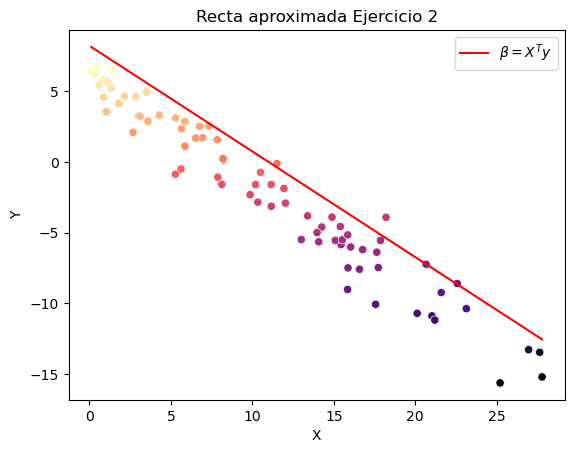

In [95]:
graficar_recta(datos2, 'X', 'Y', 'magma', 'Ejercicio 2')

In [96]:
datos2c = datos2.copy()

for index, row in datos2c.iterrows():
    row['Y'] += 12

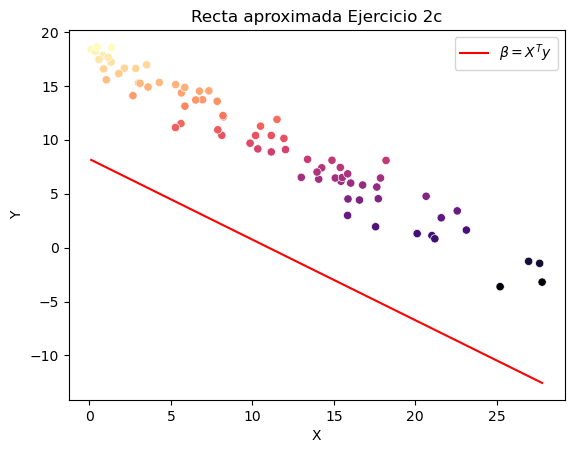

In [97]:
graficar_recta(datos2c, 'X', 'Y', 'magma', 'Ejercicio 2c')

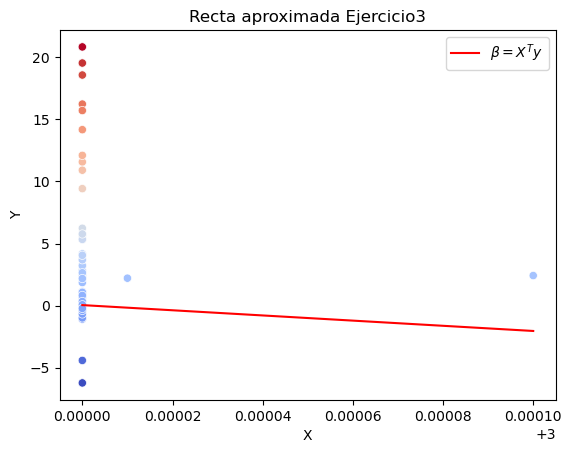

In [98]:
graficar_recta(datos3, 'X', 'Y', 'coolwarm','Ejercicio3')

In [99]:
A = datos3[['X', 'Y']].to_numpy()  

AtA = A.T @ A

det = np.linalg.det(AtA)

print(f"Determinante de A^TA: {det}")

Determinante de A^TA: 803617.1015703138


In [100]:
datos4

,x_vector,y_error
0,0.261293,5.269016
1,0.282008,4.467631
2,0.624273,3.018444
3,0.727334,3.076645
4,0.899138,2.455100
5,1.110197,2.045111
6,1.140416,2.053735
7,1.277370,1.144468
8,1.550047,0.664446
9,1.567954,0.857060


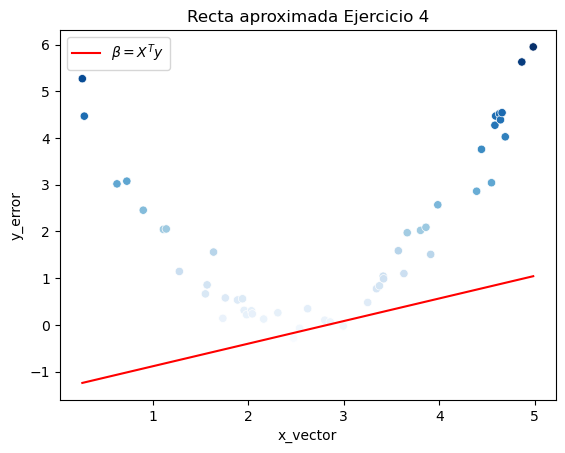

In [102]:
graficar_recta(datos4, 'x_vector', 'y_error', 'Blues', 'Ejercicio 4')